https://jalammar.github.io/illustrated-transformer/

https://colab.research.google.com/drive/1hXIQ77A4TYS4y3UthWF-Ci7V7vVUoxmQ?usp=sharing#scrollTo=twSVFOM9SopW

## What and Why Transformers?
Transformers in natural language processing (NLP) are a type of deep learning model that use "self-attention mechianisms" to analyze and process natural language data. They are encoder-decoder models that can be used for many applications, including machine translation (Seq2Seq task).

As we know encoder decoder having less accuracy with respect to long sentences because of less context to initial timestamp words 

To solve this we came up with Attention Mechanism which uses Bidirectional LSTM RNN which improves the accuracy of large sentences but here also as we are passing each word at a timestamp
- it's not "Scalable solution" as for huge dataset with respect to training as parallely we can't send all the words in a sentence
- other problem is as we are passing each word at a timestamp converting the word to vector using enbedding layers, so for each word will be getting a fixed dimension vector but there will be no contextual relationship between one vector to another 

To solve this above "Transformers" came into picture, it not uses LSTM RNN but it uses "Self-Attention Module" where all the words will be parallely sent to encoder decoder and it has "Contextual vector embedding" for each word having the context relation of other word related to it

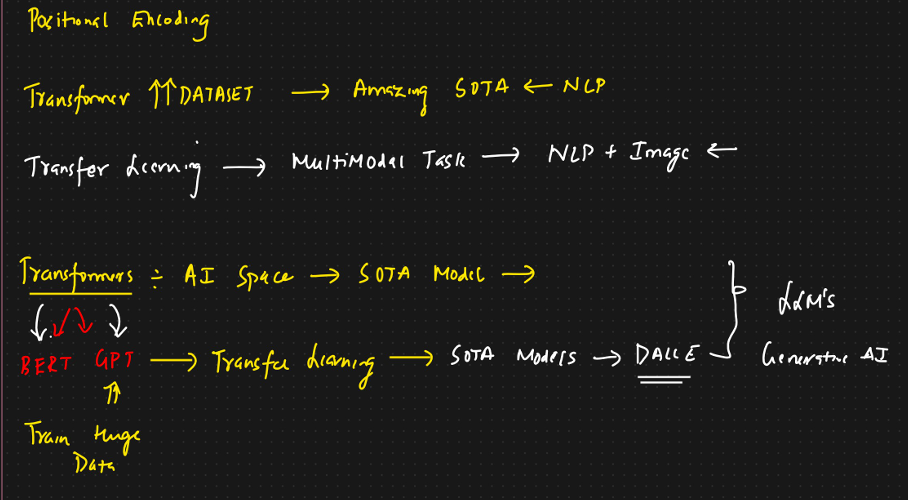

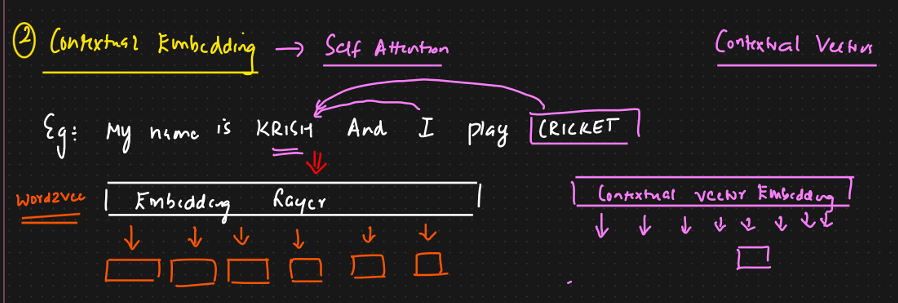

## Basic Architecture
- transformers used to solve Seq2Seq task like language translation from english to french
- it also follows encoder decoder architecture where we may have multiple encoders decoders where our input will go from one encoder to other encoder

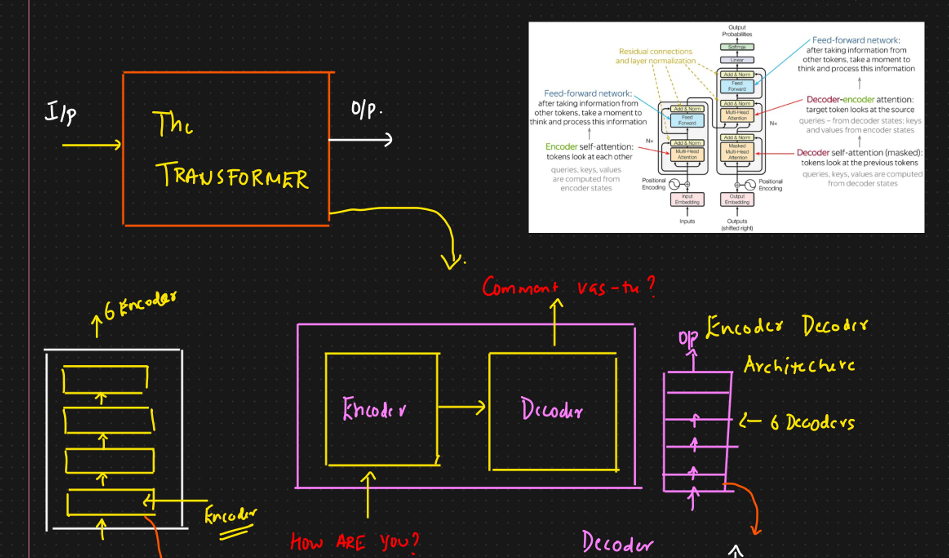

- inside each encoders will be having one self attention layer and one feed forward neural network
- inside each decoder will be having one layer of self attention, one layer of feed forward neural network and one more layer of encoder-decoder attention

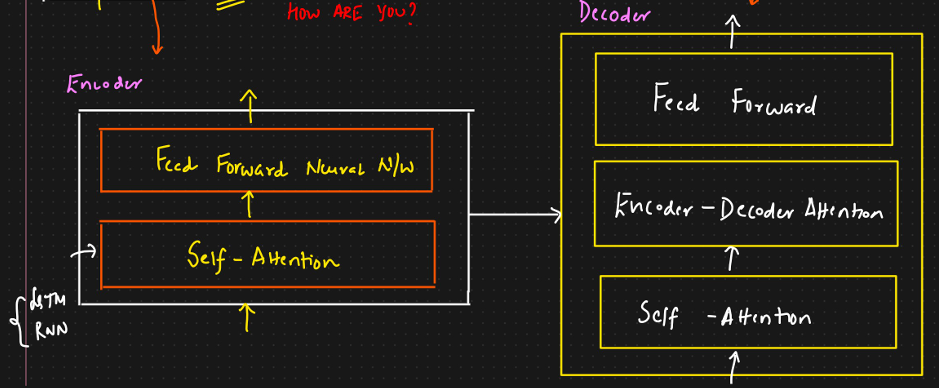

### Encoder
- in research papers, they have used 6 encoders and 6 decoders which are stacked one by one 
- in encoder we pass each word after coverting into vector by passing them through embedding layers, it will go to self attention layer which will convert the embedding vector to contextual vector and from there it will get converted into a different vectors known as Contextual vectors
    - here since we have self attention layer, all the words will be passed parallely
- the difference between the embedding layer vectors and contextual vectors is as contextual vector will having the context of different words also
- now will passing each contextual vector to feed forward neural network and getting the output as vectors which again will be send to another encoder

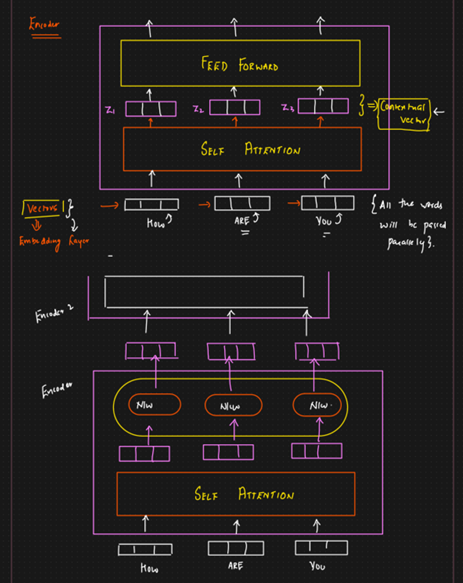

#### Self Attention inside Encoder
Self-Attention also known as "Scaled dot-product attention", is a crucial mechanism in the transformer architecture that "allows the model to weigh the importance of different tokens in the input sequence relative to each other"

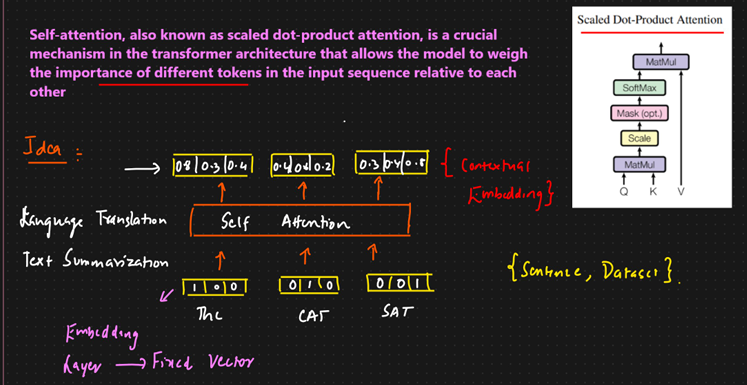

We need to drive three important vectors: Queries (Q), Keys (K) and Values (V)
- for each token will be making a model which will compute these 3 important vectors (Q,K,V)

**Query Vectors (Q)**
- Role: Query vector represent the token for which we are calculating the attention. They help determine the importance of other tokens in the context of the current token.
- Importance:   
    - Focus Determination: Queries help the model decide which parts of the sequence to focus on for each specific token. By calculating the dot product between a query vector and all key vectors, the model assesses how much attention to give to each token relative to the current token
    - Contextual Understanding: Queries contribute to understanding the relationship netween the current token and the rest of the sequence, which is essential for capturing dependencies and context

**Key Vectors (K)**
- Role: Key vectors represent all the tokens in the sequence and are used to compare with the query vectors to calculate attention score
- Importance:
    - Relevance Measurement: Keys are compared with queries to measure the relevance or compatibility of each token with the current token. This comparison helps in determining how much attention each token should receive
    - Information Retrieval: Keys play a critial role in retrieving the most relevant information from the sequence by providing a basis for the attention mechanism to compute similarity scores

**Value Vectors (V)**
- Role: Value vectors hold the actual information that will be aggregated to form the output of the attention mechanism
- Importance:
    - Information Aggregation: Values contain the data that will be weighted by the attention scores. The weighted sum of values forms the output of the self-attention mechanism, which is then passed on to the next layers in the network
    - Context Preservation: By weighting the values according to the attention scores, the model preserves and aggregates relevant context from the entire sequence, which is crucial for tasks like translation, summarization, and more

So basically we have to create a model which will convert normal vector embedding to contextual vector embeddings that model is called as "self-attention module" and will follow some steps:

1. **token embedding:** convert the words in normal word embedding vectors of fixed dimension

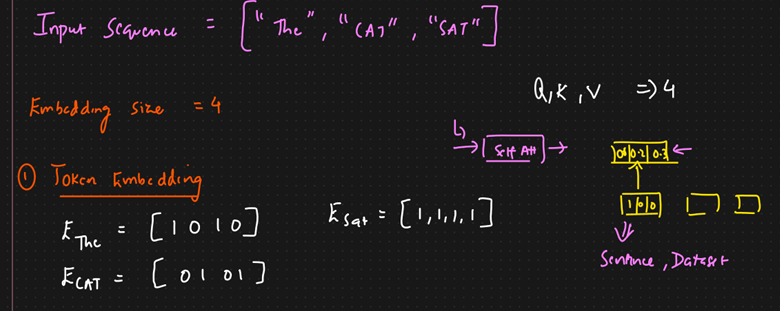

2. **linear embedding:** create Q,K,V by multiplying the embedding by learned weights matrices W(Q), W(K), W(V) which means one word embedding will do dot operation with weights will get that vectors 
    - means if take weight W(Q) then will get Query vector (Q) and so on
    - remember that here we have learned weights which means will initial some weights and then do backward propogation to get the best weights which will result in best vectors
    - here we have initialized the weights matrices with identity martices

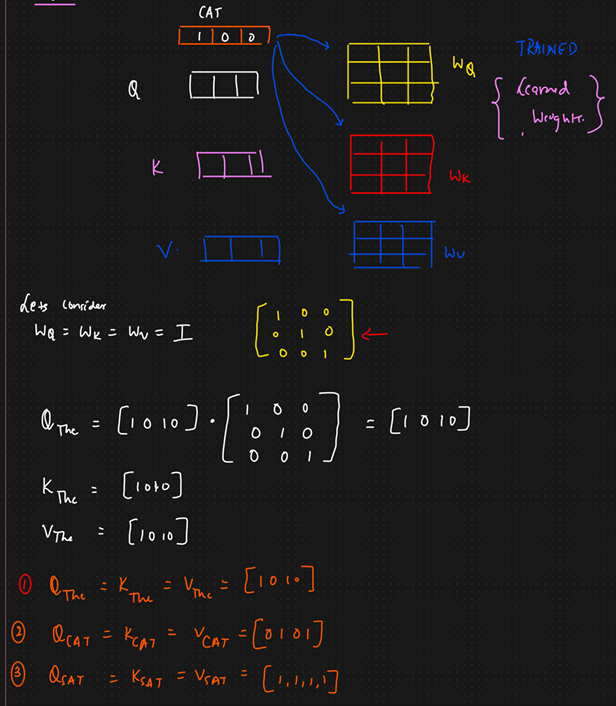

3. **Compute Attention Scores:** we need to do the dot operation of query vector and all key vector to get the importance of each token with current token
    - as both the query and key vector are of same dimension we need to take the transpose of key vector to perform the dot operation

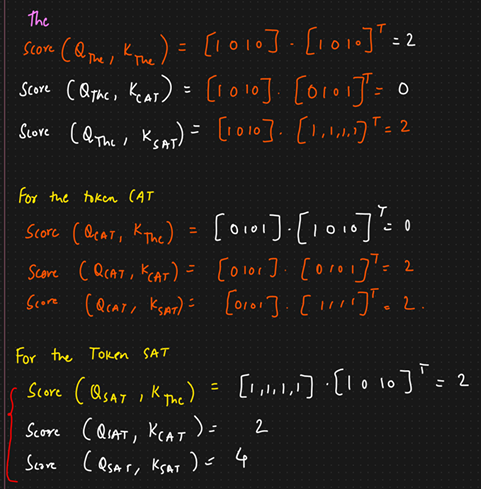

4. **Scaling and computing attention weights by applying softmax:** we take up the scores and scale down the by dividing the scores by the Sqrt(d(K)) here d(k) meand dimension of key vectors
    - Scaling in the attention mechanism is crucial to prevent the dot product from growing to large to ensure stable gradiants during training here we are talking about the dot product of query and key vector
    - as the dimension of key d(k) is getting large and we don't scale it then two problems may arise:
        - Gradient Exploding
        - Softmax Saturation: similar to vanishing gradient problem, single token might have assigned the most of the weights and other might have near to 0 so when do backward propogation the weight will not get updated
        - after applying scaling, the attention weights are more balanced 
    - Stabilizing Training: Scaling prevents extremely large dot products, which helps in stabilizing the gradients during backpropogation, making the training process more stable and efficient
    - Preventing Saturation: By scaling the dot products, the softmax function produces more balanced attention weights, preventing the model from focusing too heavily on a single token and ignoring others.
    - Improved Learning: Balanced attention weights enable the model to learn representations by considering multiple relevant tokens in the sequences, leading to better performance on tasks that require context understanding
    - Scaling ensures that the dot products are kept within a range that allows the softmax function to operate effectively, providing a more balanced distribution of attention weights and improving the overall learning process of the model

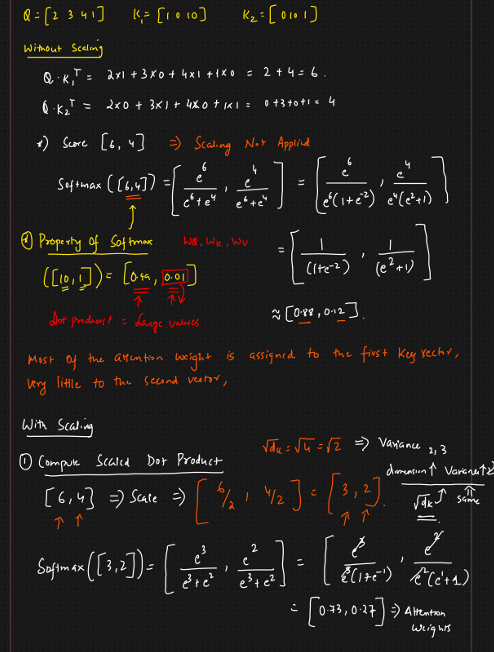

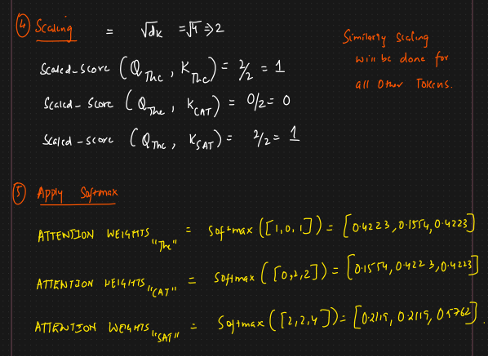

5. **Weighted Sum of Values:** we multiple the attention weights by corresponding value vectors (V)

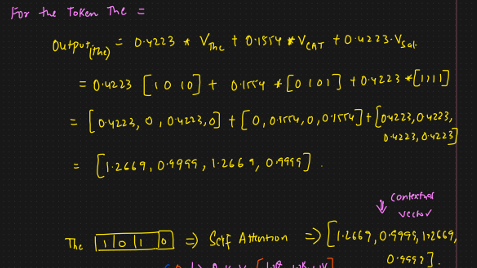

After doing the complete process will be able to get the contextual vector embedding from the normal vector embedding

##### Self Attention with Multi Heads
- All the process and steps will be same but instead of initializing the weights W(Q), W(K), W(V) once here will take different different matrices and calculate the complete process with all attention heads 
- the main aim of multi heads is it will expand the models ability to focus on different position of tokens

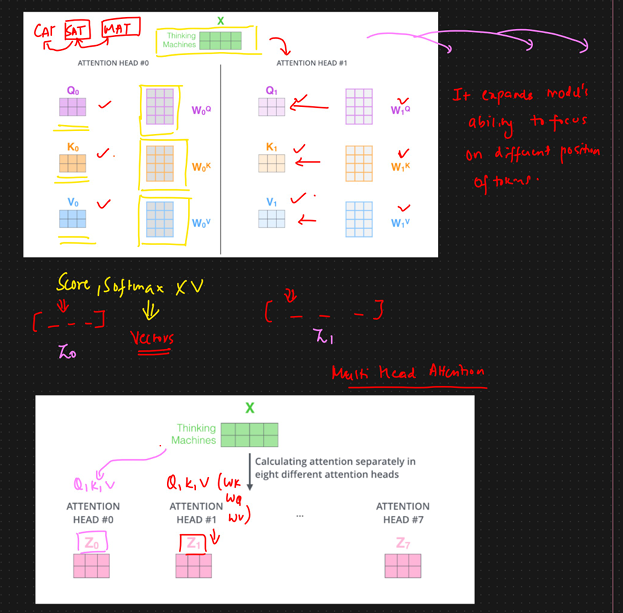

#### Feed Forward Neural Network
- as we know we need to pass the attention head which we computed from self attention mechanism as a single matrix of weights
- but if we use multi head attention for each words then will be getting multiple heads to before passing them to feed forward nerual network we need to do some computation to make them single

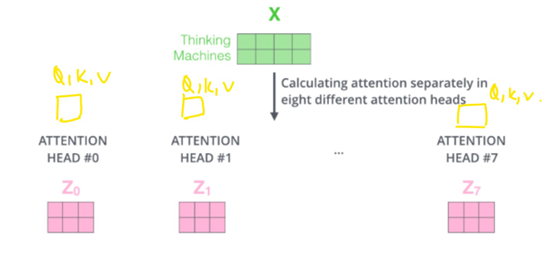

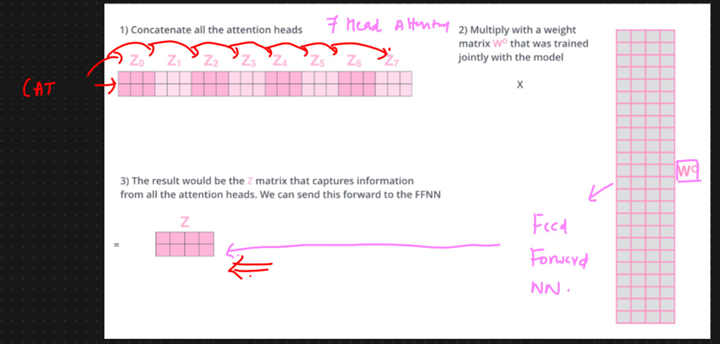

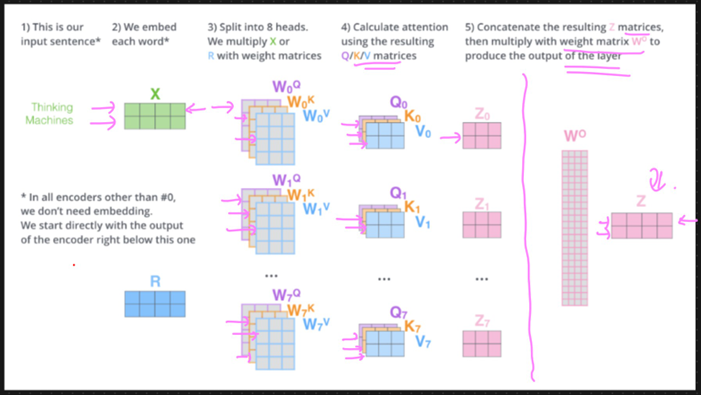

As we know the major advantage of using transformers is that we can pass and process all the word token parallely -> and becuase of this advantage there is also a drawback -> it lacks the sequential structure of the sentence means the order of the words in the sentence

In order to prevent this ordering problem, will use **"Positional Encoding"** which represents the order of sequence

##### Positional Encoding
- The idea is to add the each word embedding vector with the positional encoded vector which will have the information of each word positioning
- there are multiple ways to fix the problem of ordering of words
    - append the position of word in the embedding vector dimension but this will not efficient when the sentence length is huge and it cause issues in backpropogation 

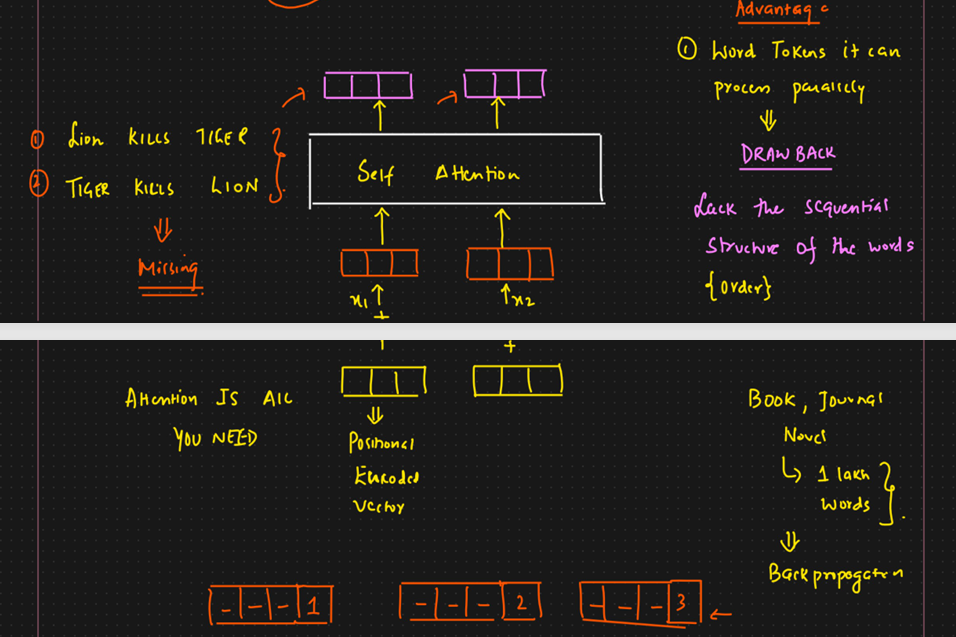

There are two different ways of creating the positional encoded vectors or types of positional encoding:
1. Sinsusoidal Positional Encoding
2. Learned Positional Encoding

##### Sinsusoidal Positional Encoding
- It uses sine and cosine functions of different frequencies to create positional encodings
- It ranges between -1 to +1
- We can get the positional encoding vector by applying the mentioned formula of sine and cosine in alternative manner 

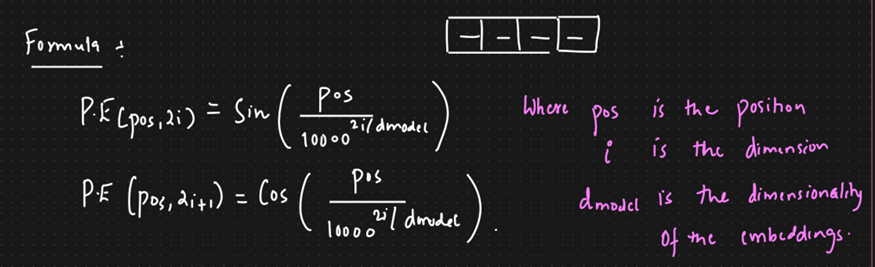

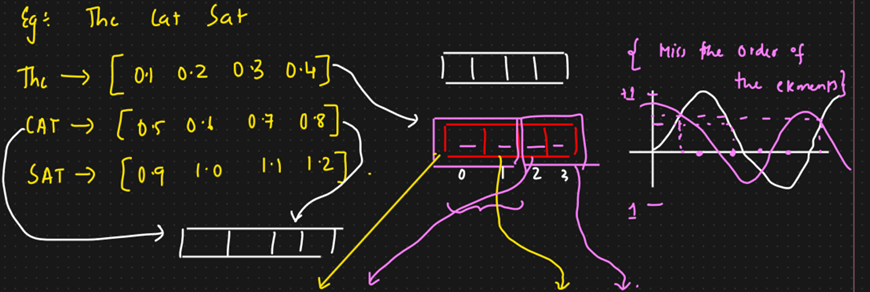

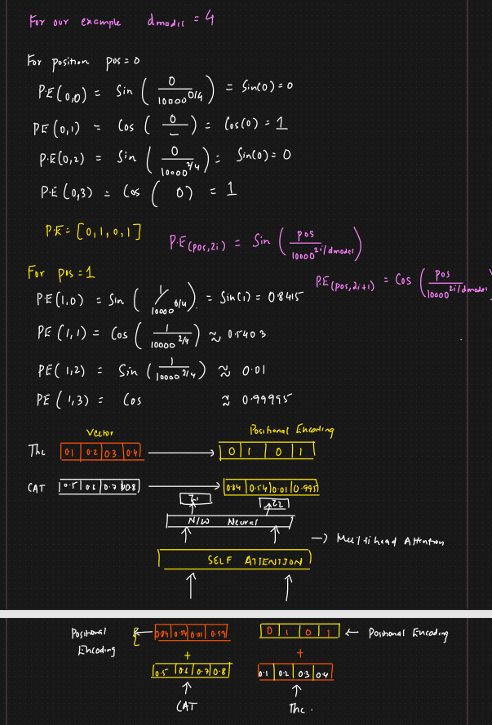

##### Learned Positional Encoding
- here the positional encoding are learned during the training means we create a prositional encoding matrix that will get updated using backpropogation

##### Normalization in Deep Learning
- Batch Normalization: take each values of output and perform normalization
- Layer Normalization: take layer by layer of each output together and perform normalization

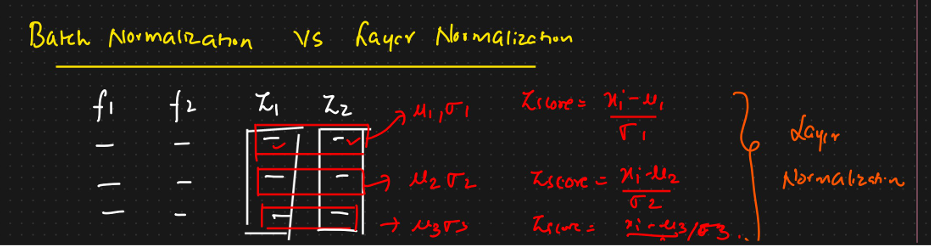

Till now we did Standard Scaling for all the features to normalize which leads to some advantages as improved training stability, when do backpropogation will not face vanishing and exploding gradient problem, faster convergence to global minima 

##### Layer Normalization in Transformers
- in the figure we see "Add & Norm" so this is the layer which usestechnique called "Layer Normalization"
- there is a term **"Residuals"** which is the combination of input embedding and positional encoding denoted as Additional signals to the layer normalization
- "Residual Connection": also known as Skip Connection Nerual Network. It is used:
    - addressing the vanishing gradient problem as residual connection create a short paths for gradients to flow directly through the network becuase of which the gradient remains sufficiently large
    - Improves gradient flow means convergences will be faster which leads smooth training
    - enables training of deeper networks
- layer normalization gets applied before feed forward nerual network and after the multi head attention

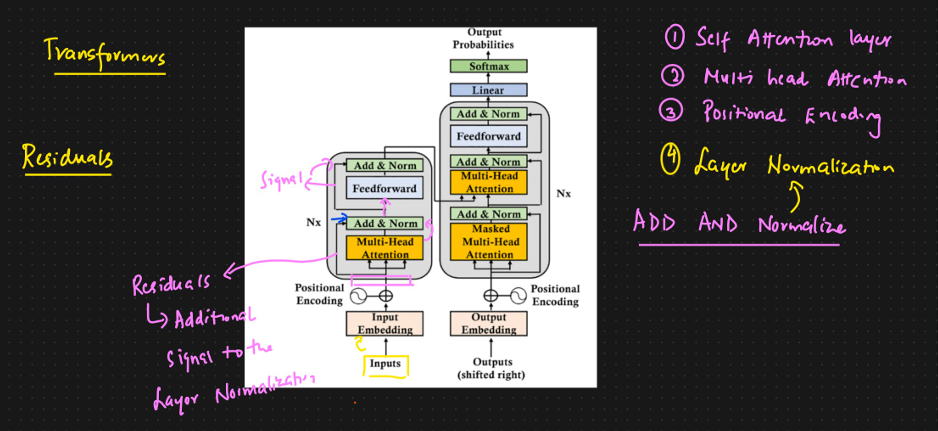

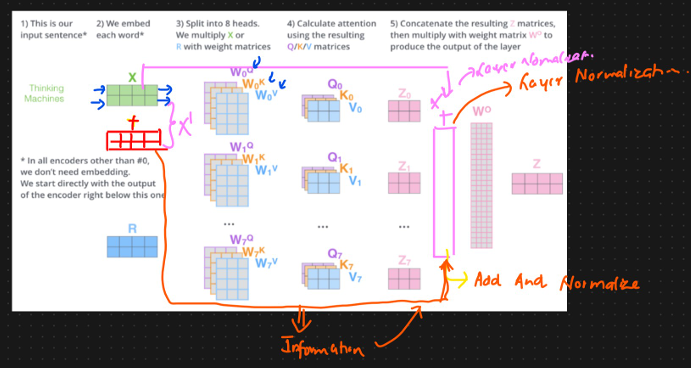

- Learnable Parameter: gama and beta (also called as Scale and Shift parameters) -> these basically used to set different different values for the case where we don't want to normalize

- Example:
    - token vector and initialize value of scale and shift parameter
    - compute the mean
    - compute the variance
    - normalize the input each value in vector
    - apply scale and shift parameters

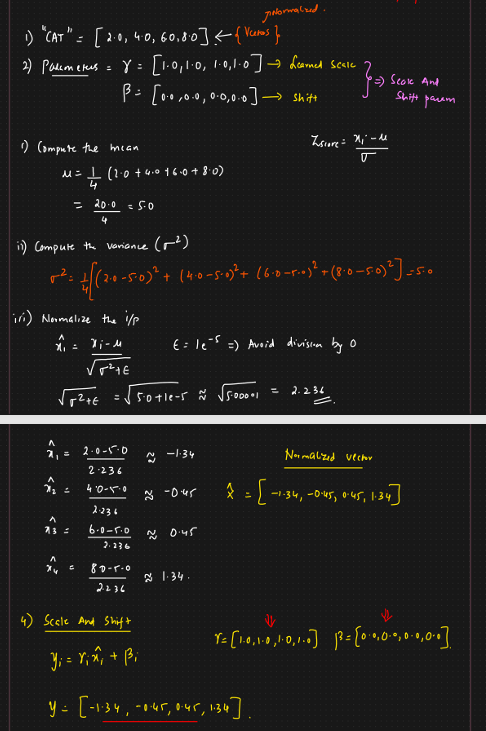

According to research paper -> we have 6 encoder and decoder inside a transformer

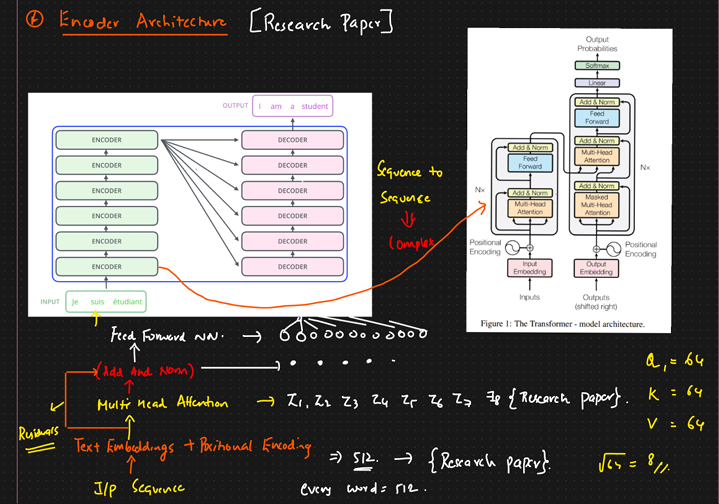

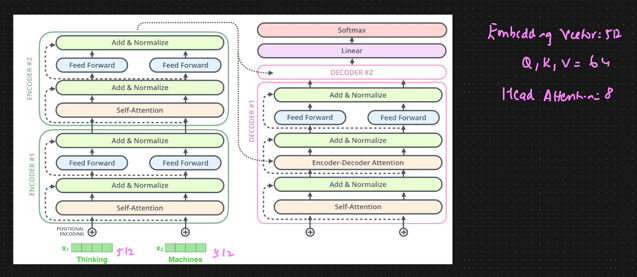

##### Feed forward Neural Network

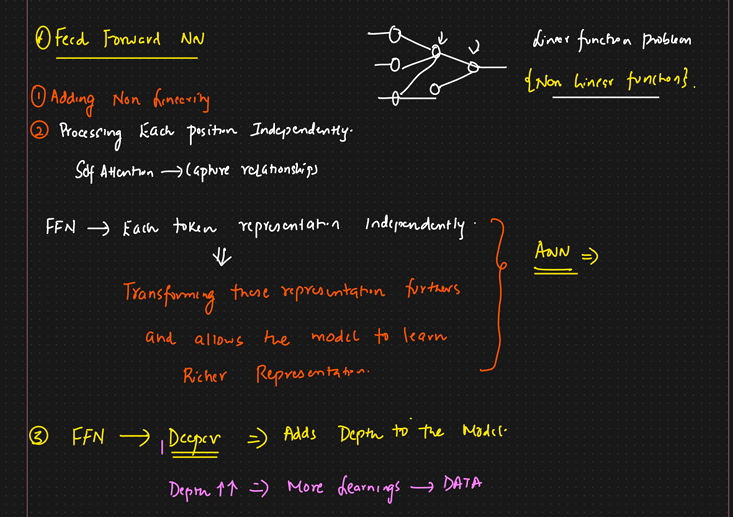

### Decoder
The transformer decoder is responsible for generating the output sequence one token at a time, using the encoder's output and the previously generated tokens. There are 3 main components:
- Masked Multi-head Self Attention
- Multi-head Attention (Encoder Decoder Attention)
- Feed Forward Neural Network

NOTE: here in transformer we pass the input to encoder and output embedding to decoder all the tokens at once but the generation of output from the decoder take place on the basis of timestamp means one word or token at a time

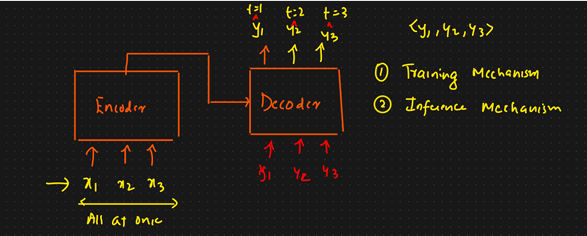

##### Masked Multi-head Self Attention 
- Step1: Input embedding and positional embedding - if the output sentence length is not equal to input sentence then apply post padding to add tailing 0's and will pass the final combination embedding to masked multi-head self attention

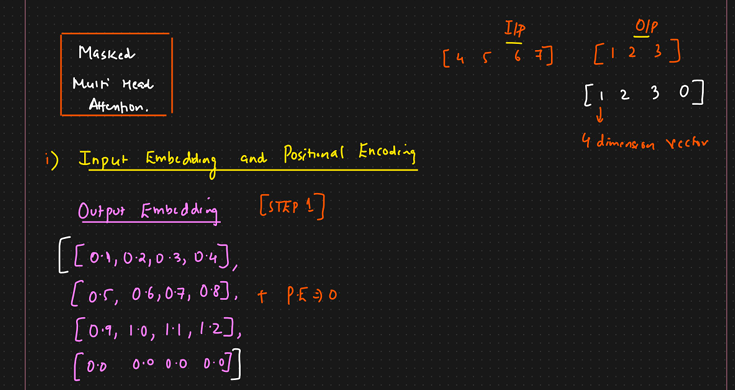

- Step2: Linear Projection to create Q, K, V vectors - initial the weight matrix of Q, K, V with identity matrix

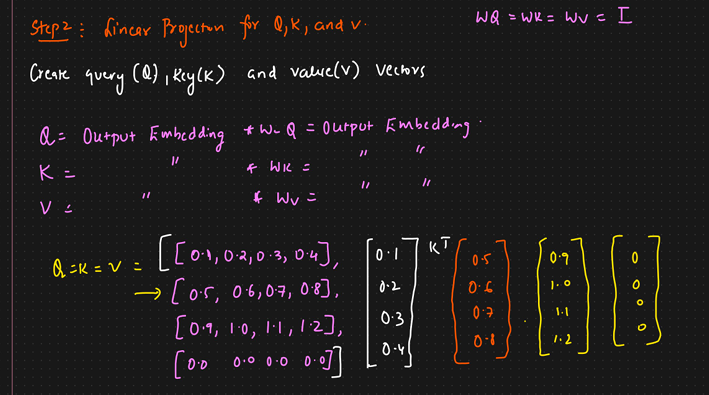

- Step3: Scaled Dot Product Attention Score - same way as we learned in self attention in encoder

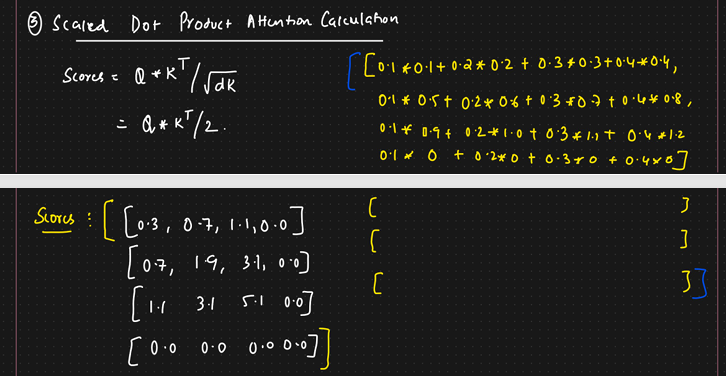

- Step4: Mask Application - It helps managing the structure of the sequences being processed and ensures the model behaves correctly during training and inferencing. Masking is done in 2 ways, in transformers will use combination of both
    - Padding Mask: Handling variable length sequences with padding mask
        - To handle sequences of different length in batch
        - To ensure that padding tokens, which are added to make sequences of uniform length, do not affect the model prediction
        - To avoid this padding to influence the attention mechanism will do "Padding Mask" so that those tokens gets ignored
        - so where the actual real token is present will make that 1 and padding as 0 in padding mask

        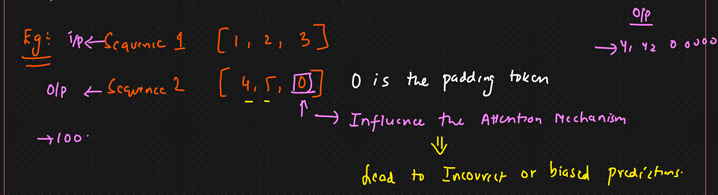

    - Look Ahead Mask: It is used to maintain Auto-Regressive Property
        - To ensure that each position in the decoder output sequence can be only attend to the previous position but not future position 
        - For different different sequence to sequence task like language translation where sequence is very much important 
        - for the token we need context keep that as 1 and future token as 0

        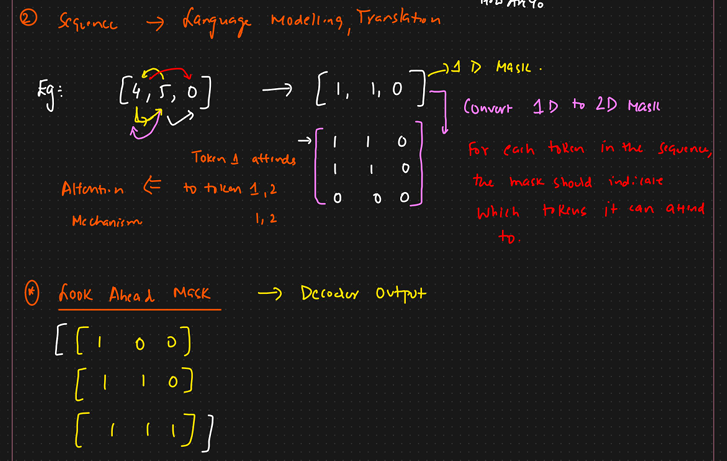

    - Combine Padding and Look Ahead Mask: Element wise multiplication of both the mask

    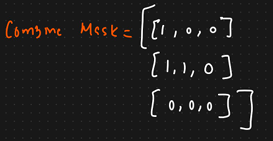

    - Compute Masked Score: in combined mask wherever 0 is present will added -infinity and then do the dot wise operation with attention score
        - why we added -infinity to zero out the influence 0 padding when softmax is applied 

    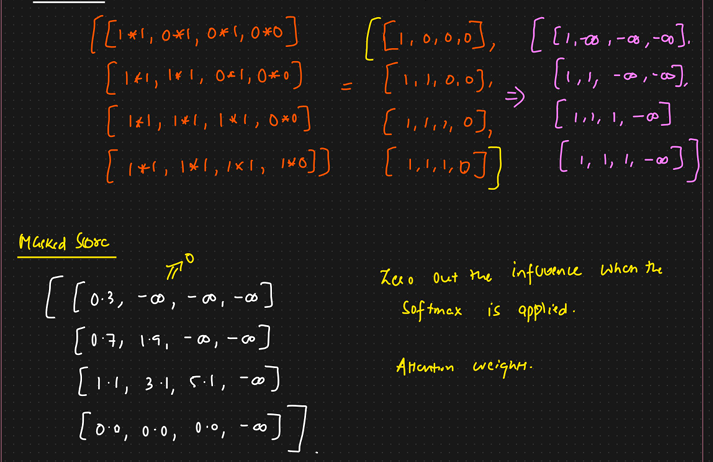

    - Apply Softmax on masked score: so here -infinity will become 0 after applying softmax function

    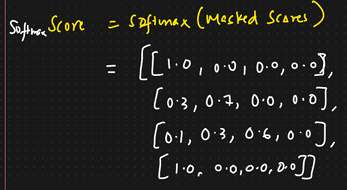

    - Weighted Sum of Values: multiple the final softmax score with the Value vector (V) to get the final output vector score

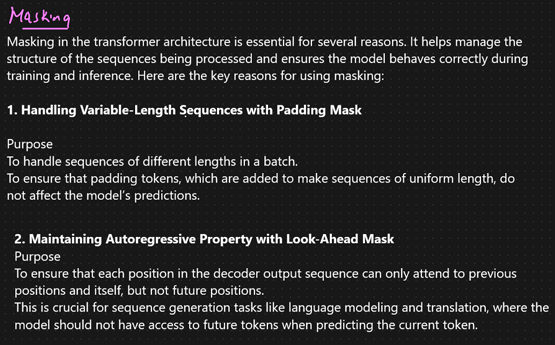

##### Encoder Decoder Multi-head Attention
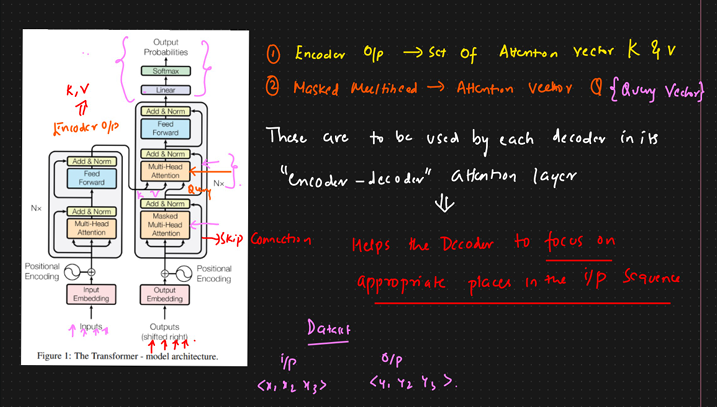

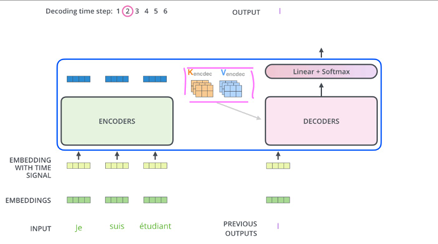

##### Linear and Softmax Layer
- The Linear Layer is a simple fully connected neural network that projects the vector produced by the stack of decoders and it generated a large vector called as "Logits vector"
- Logits vector means the model vocabulary size in cell wide and each block in logits vector corresponds to score of a unique word

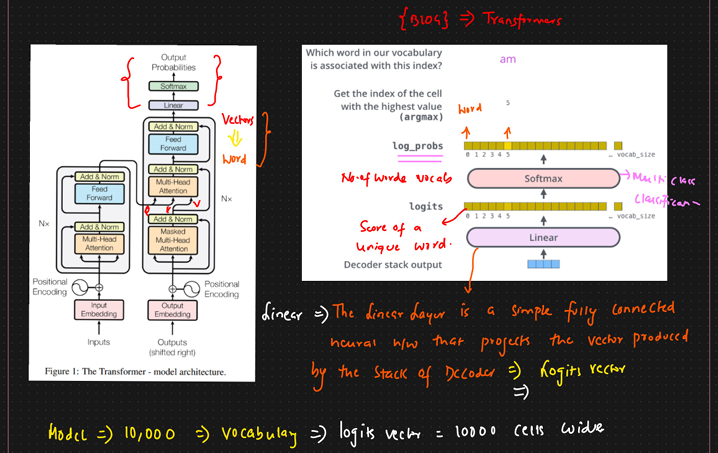

- Softmax Layer turns those scores into probabilities (all add upto 1). The cell with the higest probability is choosen and the word associated with it is produced as the output for that timestamp